### Importando todas as bibliotecas que eu posso precisar durante minha análise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import sqlite3

### Lendo o arquivo

In [2]:
df = pd.read_csv(r'C:\git-on33\On33-S13\on33-python-s13-projeto-guiado-II\exercicios\para-casa\HR_Analytics.csv')

### Vendo os primeiros detalhes do dataset: Nome das Colunas, quantidade de linhas, linhas duplicadas e valores nulos.

In [3]:
df.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Criando um backup por precaução

In [6]:
df_backup = df.copy()

### Vendo as linhas nulas

In [7]:
for nullColumn in df.columns: 
    if df[nullColumn].isnull().any(): 
        print(f"Column '{nullColumn}' contains NaN values:\n{df[nullColumn]}\n")

Column 'YearsWithCurrManager' contains NaN values:
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1475    10.0
1476    11.0
1477     2.0
1478     9.0
1479     0.0
Name: YearsWithCurrManager, Length: 1480, dtype: float64



### Procurando se tem linhas duplicadas e removendo-as (depois de me certificar de que estão erroneamente duplicadas)

In [8]:
def viewDuplicates(df):
    duplicates = df[df.duplicated(keep=False)]

    return duplicates

duplicatedLines = viewDuplicates(df)
print(duplicatedLines)

       EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
210   RM1468   27    26-35        No      Travel_Rarely        155   
211   RM1468   27    26-35        No      Travel_Rarely        155   
327   RM1461   29    26-35        No      Travel_Rarely        468   
328   RM1461   29    26-35        No      Travel_Rarely        468   
457   RM1464   31    26-35        No         Non-Travel        325   
458   RM1464   31    26-35        No         Non-Travel        325   
654   RM1470   34    26-35        No       TravelRarely        628   
655   RM1470   34    26-35        No       TravelRarely        628   
952   RM1463   39    36-45        No      Travel_Rarely        722   
954   RM1463   39    36-45        No      Travel_Rarely        722   
1304  RM1469   49    46-55        No  Travel_Frequently       1023   
1305  RM1469   49    46-55        No  Travel_Frequently       1023   
1335  RM1462   50    46-55       Yes      Travel_Rarely        410   
1336  RM1462   50   

In [9]:
df = df.drop_duplicates()

### Vendo quantas linhas sobraram

In [10]:
df.shape

(1473, 38)

### Diminuindo o dataframe selecionando colunas especificas que achei interessante

In [11]:
colunasSelecionadas = ['EmpID',
'AgeGroup', 
'Department', 
'EducationField',
'EnvironmentSatisfaction', 
'Gender',
'JobInvolvement', 
'JobLevel', 
'JobRole',
'JobSatisfaction',
'MonthlyIncome', 
'SalarySlab',
'NumCompaniesWorked', 
'PercentSalaryHike', 
'PerformanceRating', 
'RelationshipSatisfaction',
'TotalWorkingYears',
'TrainingTimesLastYear', 
'YearsAtCompany',
'YearsInCurrentRole', 
'YearsSinceLastPromotion',]

dfNovo = df[colunasSelecionadas]
dfNovo

,EmpID,AgeGroup,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,SalarySlab,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18-25,Research & Development,Life Sciences,3,Male,3,1,Laboratory Technician,3,...,Upto 5k,1,13,3,3,0,2,0,0,0
1,RM302,18-25,Sales,Medical,4,Female,2,1,Sales Representative,3,...,Upto 5k,1,12,3,1,0,2,0,0,0
2,RM458,18-25,Sales,Marketing,2,Male,3,1,Sales Representative,2,...,Upto 5k,1,14,3,4,0,3,0,0,0
3,RM728,18-25,Research & Development,Life Sciences,2,Male,3,1,Research Scientist,4,...,Upto 5k,1,15,3,4,0,2,0,0,0
4,RM829,18-25,Research & Development,Medical,3,Male,3,1,Laboratory Technician,3,...,Upto 5k,1,12,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,55+,Research & Development,Life Sciences,1,Female,3,5,Manager,1,...,15k+,5,11,3,4,33,5,29,8,11
1476,RM428,55+,Sales,Marketing,3,Female,2,3,Sales Executive,1,...,10k-15k,4,19,3,4,22,5,18,13,13
1477,RM537,55+,Sales,Marketing,1,Male,3,2,Sales Executive,1,...,5k-10k,8,14,3,4,10,1,2,2,2
1478,RM880,55+,Sales,Marketing,2,Male,4,2,Sales Executive,4,...,5k-10k,0,18,3,2,12,3,11,7,1


In [12]:
dfNovo.head()

,EmpID,AgeGroup,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,SalarySlab,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18-25,Research & Development,Life Sciences,3,Male,3,1,Laboratory Technician,3,...,Upto 5k,1,13,3,3,0,2,0,0,0
1,RM302,18-25,Sales,Medical,4,Female,2,1,Sales Representative,3,...,Upto 5k,1,12,3,1,0,2,0,0,0
2,RM458,18-25,Sales,Marketing,2,Male,3,1,Sales Representative,2,...,Upto 5k,1,14,3,4,0,3,0,0,0
3,RM728,18-25,Research & Development,Life Sciences,2,Male,3,1,Research Scientist,4,...,Upto 5k,1,15,3,4,0,2,0,0,0
4,RM829,18-25,Research & Development,Medical,3,Male,3,1,Laboratory Technician,3,...,Upto 5k,1,12,3,4,0,0,0,0,0


In [13]:
dfNovo.describe()

,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,2.723693,2.729803,2.063815,2.728445,6500.228785,2.693143,15.212492,3.153428,2.712152,11.277665,2.800407,7.004752,4.228106,2.183978
std,1.093006,0.712115,1.106429,1.103163,4706.053923,2.496914,3.657230,0.360522,1.081575,7.776228,1.289411,6.121004,3.621096,3.220301
min,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000
50%,3.000000,3.000000,2.000000,3.000000,4908.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000
75%,4.000000,3.000000,3.000000,4.000000,8380.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000
max,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,40.000000,18.000000,15.000000


### Salvando o novo dataframe com as colunas selecionadas

In [14]:
# salvar no csv
dfNovo.to_csv('PeopleAnalytics.csv', index=False)

In [15]:
def viewDuplicates(dfNovo):
    duplicates = dfNovo[dfNovo.duplicated(keep=False)]

    return duplicates

duplicatedLines = viewDuplicates(dfNovo)
print(duplicatedLines)

      EmpID AgeGroup              Department EducationField  \
161  RM1465    26-35                   Sales          Other   
162  RM1465    26-35                   Sales          Other   
802  RM1466    36-45  Research & Development        Medical   
803  RM1466    36-45  Research & Development        Medical   
953  RM1467    36-45  Research & Development        Medical   
955  RM1467    36-45  Research & Development        Medical   

     EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
161                        4  Female               2         1   
162                        4  Female               2         1   
802                        3    Male               4         2   
803                        3    Male               4         2   
953                        4    Male               2         3   
955                        4    Male               2         3   

                       JobRole  JobSatisfaction  ...  SalarySlab  \
161       Sales Representat

In [16]:
dfNovo = dfNovo.drop_duplicates()

# Iniciando as Análises

## Satisfação dos Colaboradores com o ambiente de trabalho:

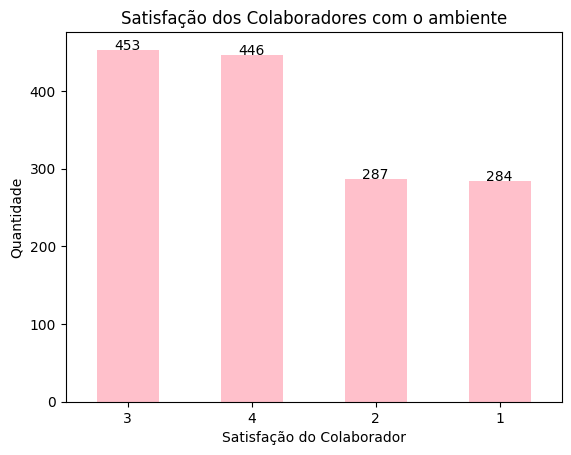

In [17]:
satisfactionRate = dfNovo['EnvironmentSatisfaction'].value_counts()

#criando o grafico
barras = satisfactionRate.plot.bar(color='pink')

#configurações
plt.xlabel('Satisfação do Colaborador')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Satisfação dos Colaboradores com o ambiente')

# Adicionar rótulos nos graficos
for i, v in enumerate(satisfactionRate):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

Nota-se que mais da metade dos colaboradores dessa empresa estão satisfeitos com seu ambiente de trabalho

In [18]:
totalColab = dfNovo['EmpID'].value_counts().sum()
satisfactionRate.sum() 
satisfactRatePerc = (satisfactionRate / totalColab) * 100
satisfactRatePerc

EnvironmentSatisfaction
3    30.816327
4    30.340136
2    19.523810
1    19.319728
Name: count, dtype: float64

### Satisfação dos colaboradores com seus empregos

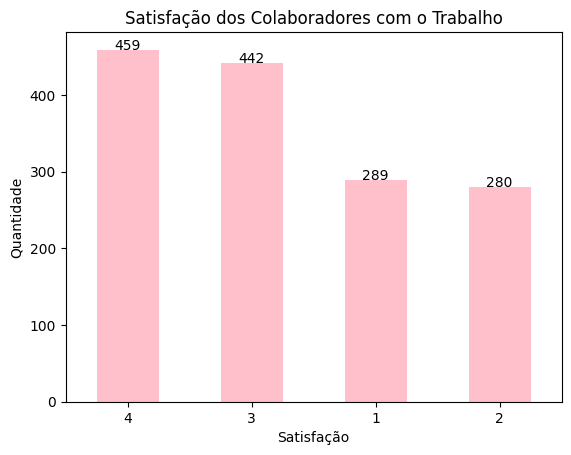

In [19]:
jobSatisfactionRate = dfNovo['JobSatisfaction'].value_counts()

#criando o grafico
barras = jobSatisfactionRate.plot.bar(color='pink')

#configurações
plt.xlabel('Satisfação')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Satisfação dos Colaboradores com o Trabalho')

# Adicionar rótulos nos graficos
for i, v in enumerate(jobSatisfactionRate):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

Resultado igual ao primeiro

In [20]:
totalColab = dfNovo['EmpID'].value_counts().sum()
jobSatisfactionRate.sum() 
(satisfactionRate / totalColab) * 100

EnvironmentSatisfaction
3    30.816327
4    30.340136
2    19.523810
1    19.319728
Name: count, dtype: float64

## Média salarial da Empresa

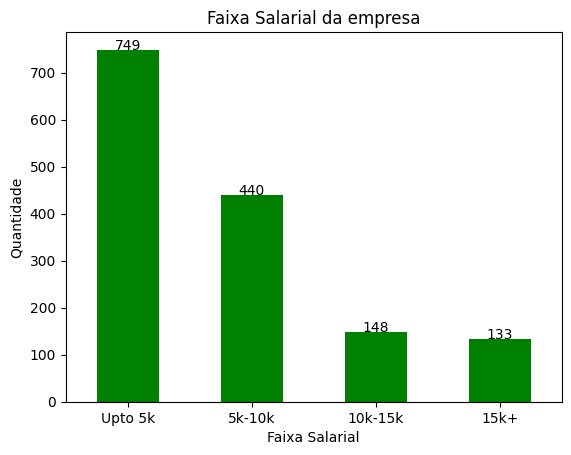

In [21]:
employeesIncome = dfNovo['SalarySlab'].value_counts()

#criando o grafico
barras = employeesIncome.plot.bar(color='green')

#configurações
plt.xlabel('Faixa Salarial')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Faixa Salarial da empresa')

# Adicionar rótulos nos graficos
for i, v in enumerate(employeesIncome):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

A maior parte recebe até 10mil

## Faixa Etária dentre os colaboradores

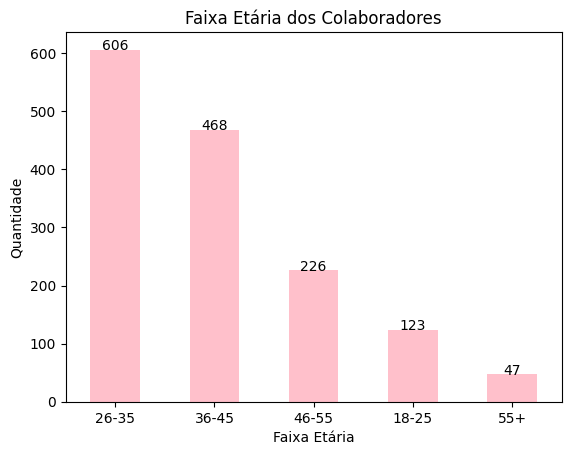

In [22]:
employeesAge = dfNovo['AgeGroup'].value_counts()

#criando o grafico
barras = employeesAge.plot.bar(color='pink')

#configurações
plt.xlabel('Faixa Etária')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Faixa Etária dos Colaboradores')

# Adicionar rótulos nos graficos
for i, v in enumerate(employeesAge):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

Grande parte do quadro tem menos de 46 anos.

## Diferença de Gêneros

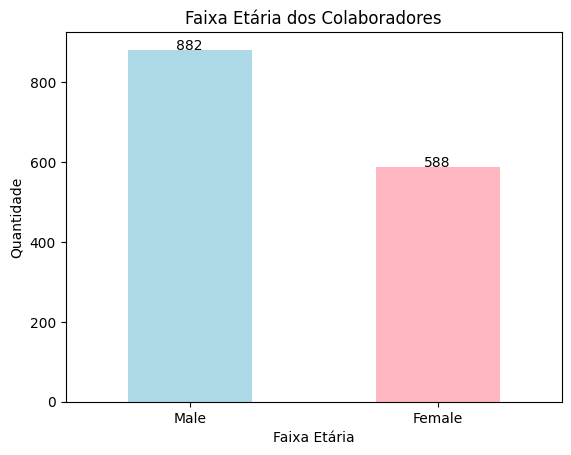

In [23]:
employeesGender = dfNovo['Gender'].value_counts()

# cores para barras
cores = ['lightblue', 'lightpink']

#criando o grafico
barras = employeesGender.plot.bar(color=cores)

#configurações
plt.xlabel('Faixa Etária')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Faixa Etária dos Colaboradores')

# Adicionar rótulos nos graficos
for i, v in enumerate(employeesGender):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

A empresa possui mais colaboradores Homens do que Mulheres

### Hipotese a ser estudada: O salário influencia na Satisfação do colaborador?

In [24]:
# Criando a nova coluna 'Satisfaction'
dfNovo['Satisfaction'] = dfNovo['JobSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)
dfNovo.head()

C:\Users\biamo\AppData\Local\Temp\ipykernel_13376\755781987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNovo['Satisfaction'] = dfNovo['JobSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)


,EmpID,AgeGroup,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Satisfaction
0,RM297,18-25,Research & Development,Life Sciences,3,Male,3,1,Laboratory Technician,3,...,1,13,3,3,0,2,0,0,0,1
1,RM302,18-25,Sales,Medical,4,Female,2,1,Sales Representative,3,...,1,12,3,1,0,2,0,0,0,1
2,RM458,18-25,Sales,Marketing,2,Male,3,1,Sales Representative,2,...,1,14,3,4,0,3,0,0,0,0
3,RM728,18-25,Research & Development,Life Sciences,2,Male,3,1,Research Scientist,4,...,1,15,3,4,0,2,0,0,0,1
4,RM829,18-25,Research & Development,Medical,3,Male,3,1,Laboratory Technician,3,...,1,12,3,4,0,0,0,0,0,1


Teste T de Salário
Estatística T : -0.26947210055483584
Valor P: 0.787612939487669


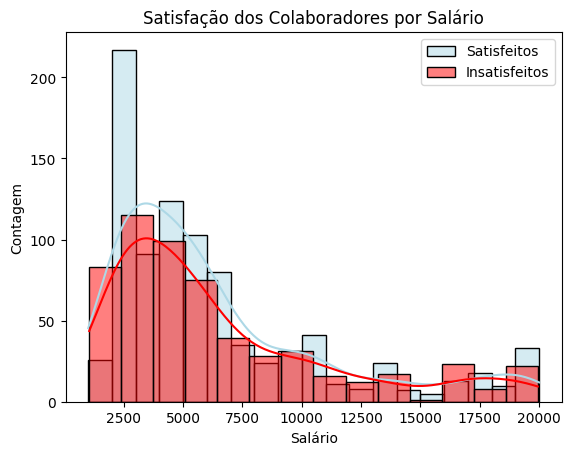

Não rejeitamos a hipótese nula


In [25]:
# Amostras
happy = dfNovo[dfNovo['Satisfaction'] == 1]['MonthlyIncome'].dropna()
unhappy = dfNovo[dfNovo['Satisfaction'] == 0]['MonthlyIncome'].dropna()


# Teste t
estatistica_t, valor_p = ttest_ind(happy, unhappy, equal_var=False)

print("Teste T de Salário")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")


#grafico
sns.histplot(happy, color= 'lightblue', label ='Satisfeitos', kde=True)
sns.histplot(unhappy, color = 'red', label = 'Insatisfeitos', kde=True)


#rotulos
plt.legend()
plt.title("Satisfação dos Colaboradores por Salário")
plt.xlabel("Salário")
plt.ylabel("Contagem")
plt.show()


#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")